In [1]:
import os
import sys
import pathlib
import argparse
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from keras_yolo3.yolo import YOLO
import matplotlib.pyplot as plt

# Set up path names
root = pathlib.Path().absolute()
input_path = os.path.join(root, "input_images")
output_path = os.path.join(root, "output_images")
weights_path = os.path.join(root, "weights")
model_weights = os.path.join(weights_path, "yolo.h5")
anchors_path = os.path.join(weights_path, "yolo_anchors.txt")
model_classes = os.path.join(weights_path, "coco_classes.txt")

img_endings = (".jpg", ".jpeg", ".png")


In [7]:
# Create function to return all image file paths inside the input_images directory in list format
def get_inputs(directory):
    """
    Iterates through all files in directory and returns img path of all images in list format
    """

    img_path = []
    vid_path = []
    for subdir, dirs, files in os.walk(directory):
        for f in files:
            if f.endswith(img_endings):
                img_path.append(input_path + "/" + f)
    
    return img_path

# Get anchors from anchors path. Take it from Train_utils
def get_anchors(anchors_path):
    """
    Get anchors from anchors path
    """

    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(",")]
    return np.array(anchors).reshape(-1, 2)

# iterate through input image path and pass image file into the yolo model for prediction
def predict(yolo, img_path):
    """
    Passes image file into the YOLO Model for prediction

    Arguments:
        yolo {Model} -- The YOLO Model
        img_paths {list} -- list of image paths to iterate over
    
    Returns:
        bbox [list] -- bbox of image
    """

    img = cv2.imread(img_path)
    print(f"Reading: {img_path}")

    # Perform Histogram normalisation (exposure compensation)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img[:,:,2] = clahe.apply(img[:,:,2])
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

    im_pil = Image.fromarray(img)

    prediction, new_image = yolo.detect_image(im_pil, False) # new_image can be omitted if saved image is not needed
    # cv2.imwrite(output_path + f"/{i}.jpg", new_image)
    img1 = np.asarray(new_image)

    plt.imshow(img1)
    plt.figure()

    bbox = []

    for single_prediction in prediction:
        left, top, right, bottom = single_prediction[0], single_prediction[1], single_prediction[2], single_prediction[3]
        bbox.append([left, top, right, bottom])

    return bbox, img



f:\Onedrive Personal\OneDrive - UNSW\2021 T1\COMP9517 - Computer Vision\src\yolo_model\weights\yolo.h5 model, anchors, and classes loaded in 18.66sec.
Reading: f:\Onedrive Personal\OneDrive - UNSW\2021 T1\COMP9517 - Computer Vision\src\yolo_model\input_images/035.jpg
Bounding box: 574, 620, 1245, 720
Bounding box: 608, 339, 640, 366
Bounding box: 707, 343, 744, 368
Bounding box: 873, 343, 1065, 448
Reading: f:\Onedrive Personal\OneDrive - UNSW\2021 T1\COMP9517 - Computer Vision\src\yolo_model\input_images/040.jpg
Bounding box: 566, 629, 1267, 720
Bounding box: 610, 338, 641, 364
Bounding box: 705, 341, 742, 369
Bounding box: 873, 346, 1066, 444
Reading: f:\Onedrive Personal\OneDrive - UNSW\2021 T1\COMP9517 - Computer Vision\src\yolo_model\input_images/174067073_504365460943064_7980840397046453122_n.png
Bounding box: 463, 273, 481, 292
Bounding box: 572, 275, 595, 295
Bounding box: 0, 267, 265, 416
Bounding box: 442, 272, 473, 300
Bounding box: 523, 274, 546, 292
Bounding box: 477, 282,

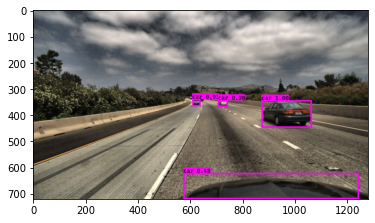

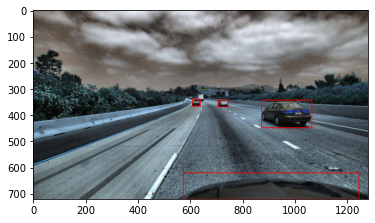

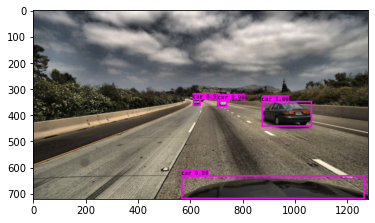

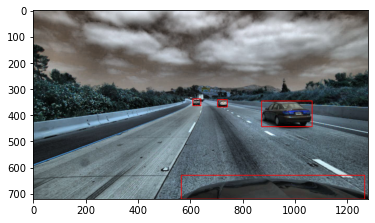

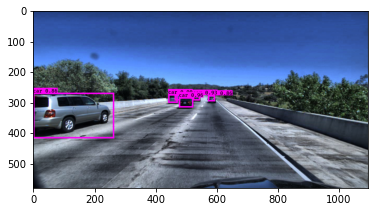

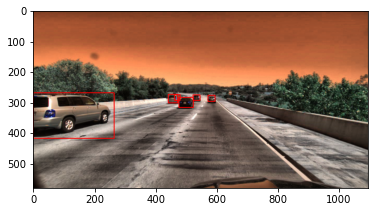

<Figure size 432x288 with 0 Axes>

In [10]:
# Initialise yolo model with keras_yolo3 and populate the data
yolo = YOLO(
    **{
        "model_path": model_weights,
        "anchors_path": anchors_path,
        "classes_path": model_classes,
        "score": 0.25, # Threshold for confidence scores
        "gpu_num": 1, # Number of GPU to use
        "model_image_size": (416, 416),
    }
)

img_paths = get_inputs(input_path)
for i, img_path in enumerate(img_paths): # Iterate through all of the images in the directory
    bbox_image, image = predict(yolo, img_path) # List of bounding boxes for all the cars in the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for left, top, right, bottom in bbox_image:
        # For each car
        print(f"Bounding box: {left}, {top}, {right}, {bottom}")
        image = cv2.rectangle(image, (left, top), (right, bottom), (255,0,0), 2)
        # TODO: Perform Calculations here

    plt.imshow(image)
    plt.figure()
    cv2.imwrite(r"F:\Onedrive Personal\OneDrive - UNSW\2021 T1\COMP9517 - Computer Vision\src\yolo_model\output_images" + f"/{i}.jpg", image)

